Text(0, 0.5, 'sigmoid(z)值')

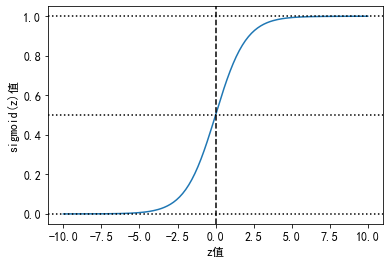

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "SimHei"
plt.rcParams["axes.unicode_minus"] = False
plt.rcParams["font.size"] = 12

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 200)
plt.plot(z, sigmoid(z))
# 绘制水平线与垂直线。
plt.axvline(x=0, ls="--", c="k")

plt.axhline(ls=":", c="k")
plt.axhline(y=0.5, ls=":", c="k")
plt.axhline(y=1, ls=":", c="k")

plt.xlabel("z值")
plt.ylabel("sigmoid(z)值")

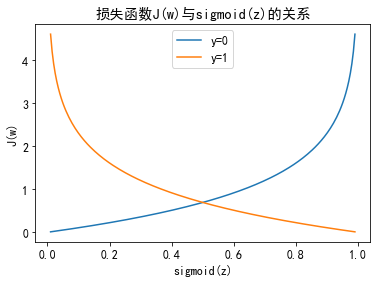

In [2]:
# 定义sigmoid(z)的取值。
s = np.linspace(0.01, 0.99, 200)
for y in [0, 1]:
    # 计算损失函数J(w)的值。
    loss = -y * np.log(s)-(1 - y) * np.log(1 - s)
    plt.plot(s, loss, label=f"y={y}")
plt.legend()
plt.xlabel("sigmoid(z)")
plt.ylabel("J(w)")
plt.title("损失函数J(w)与sigmoid(z)的关系")
plt.show()

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings("ignore")

iris = load_iris()
X, y = iris.data, iris.target
# 因为鸢尾花具有三个类别，4个特征，此处仅使用其中两个特征，并且移除一个类别（类别0）。
X = X[y != 0, 2:]
y = y[y != 0]
# 此时，y的标签为1与2，我们这里将其改成0与1。（仅仅是为了习惯而已）
y[y == 1] = 0
y[y == 2] = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=2)
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_hat = lr.predict(X_test)
print("权重：", lr.coef_)
print("偏置：", lr.intercept_)
print("真实值：", y_test)
print("预测值：", y_hat)

权重： [[2.54536368 2.15257324]]
偏置： [-16.08741502]
真实值： [1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 1]
预测值： [1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 1]


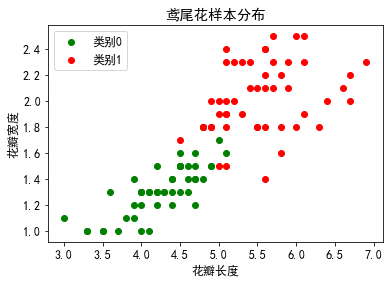

In [4]:
c1 = X[y == 0]
c2 = X[y == 1]
plt.scatter(x=c1[:, 0], y=c1[:, 1], c="g", label="类别0")
plt.scatter(x=c2[:, 0], y=c2[:, 1], c="r", label="类别1")
plt.xlabel("花瓣长度")
plt.ylabel("花瓣宽度")
plt.title("鸢尾花样本分布")
plt.legend()

In [5]:
print(y_test)
print(y_hat)

[1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 1]
[1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 1]


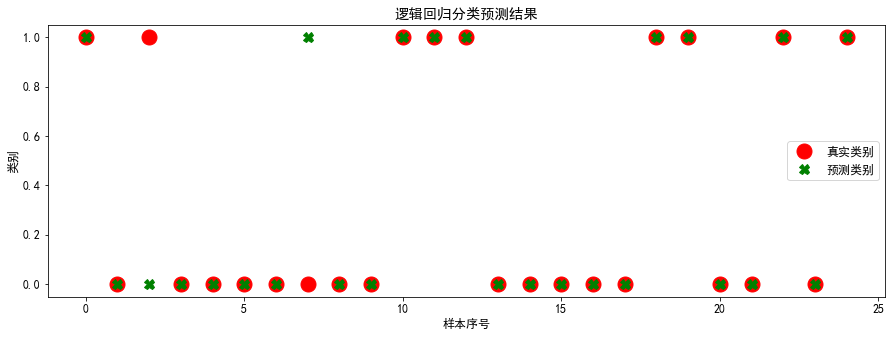

In [7]:
plt.figure(figsize=(15, 5))
plt.plot(y_test, marker="o", ls="", ms=15, c="r", label="真实类别")
plt.plot(y_hat, marker="X", ls="", ms=15, c="g", label="预测类别")
plt.legend()
plt.xlabel("样本序号")
plt.ylabel("类别")
plt.title("逻辑回归分类预测结果")
plt.show()

[[0.46933862 0.53066138]
 [0.98282882 0.01717118]
 [0.72589695 0.27410305]
 [0.91245661 0.08754339]
 [0.80288412 0.19711588]]
[1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 1]


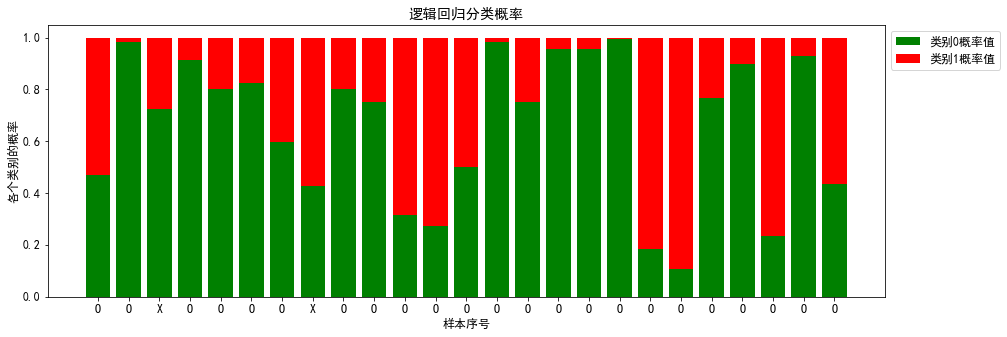

In [8]:
# 获取预测的概率值，包含数据属于每个类别的概率。
probability = lr.predict_proba(X_test)
print(probability[:5])
# 获取每一行最大值的索引，就等价于预测结果。
print(np.argmax(probability, axis=1))
# 产生序号，用于可视化的横坐标。
index = np.arange(len(X_test))
# 分别获取类别0与类别1的概率。
pro_0 = probability[:, 0]
pro_1 = probability[:, 1]
tick_label = np.where(y_test == y_hat, "O", "X")
plt.figure(figsize=(15, 5))
# 绘制堆叠图
plt.bar(index, height=pro_0, color="g", label="类别0概率值")
# bottom=x，表示从x的值开始堆叠上去。
# tick_label 设置标签刻度的文本内容。
plt.bar(index, height=pro_1, color='r', bottom=pro_0, label="类别1概率值",
tick_label=tick_label)
plt.legend(loc="best", bbox_to_anchor=(1, 1))
plt.xlabel("样本序号")
plt.ylabel("各个类别的概率")
plt.title("逻辑回归分类概率")
plt.show()

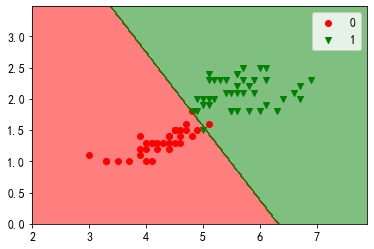

In [9]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(model, X, y):
    """绘制model模型的决策边界。
    绘制决策边界，同时绘制样本数据X与对应的类别y
    用于可视化模型的分类效果。
    Parameters
    ----------
    model : object
    模型对象。
    X : array-like
    需要绘制的样本数据。
    y : array-like
    每个样本数据对应的类别（标签）。
    """
    # 定义不同类别的颜色与符号。可以用于二分类与三分类。
    color = ["r", "g", "b"]
    marker = ["o", "v", "x"]
    # 获取数据中不重复的标签。
    class_label = np.unique(y)
    # 定义颜色图，在绘制等高线的时候使用，不同的值使用不同的颜色来绘制。
    cmap = ListedColormap(color[: len(class_label)])
    # 获取每个特征的最小值与最大值。
    x1_min, x2_min = np.min(X, axis=0)
    x1_max, x2_max = np.max(X, axis=0)
    # 定义每个特征的取值范围。
    x1 = np.arange(x1_min - 1, x1_max + 1, 0.02)
    x2 = np.arange(x2_min - 1, x2_max + 1, 0.02)
    # 对数组x1,x2进行扩展，获取二者的笛卡尔积组合，用于送入模型中，进行预测。
    X1, X2 = np.meshgrid(x1, x2)
    # 将之前两个特征的笛卡尔积组合送入模型中，预测结果。
    Z = model.predict(np.array([X1.ravel(),
    X2.ravel()]).T).reshape(X1.shape)
    # 根据Z值的不同，绘制等高线（不同的值使用不同的颜色表示）。
    plt.contourf(X1, X2, Z, cmap=cmap, alpha=0.5)
    # 绘制样本数据X。
    for i, class_ in enumerate(class_label):
        plt.scatter(x=X[y == class_, 0], y=X[y == class_, 1], c=cmap.colors[i], label=class_, marker=marker[i])
    plt.legend()

plot_decision_boundary(lr, X_train, y_train)

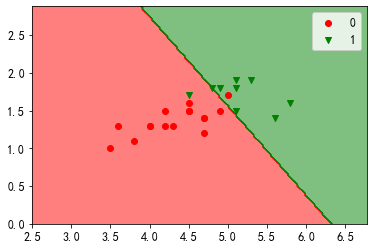

In [10]:
plot_decision_boundary(lr, X_test, y_test)

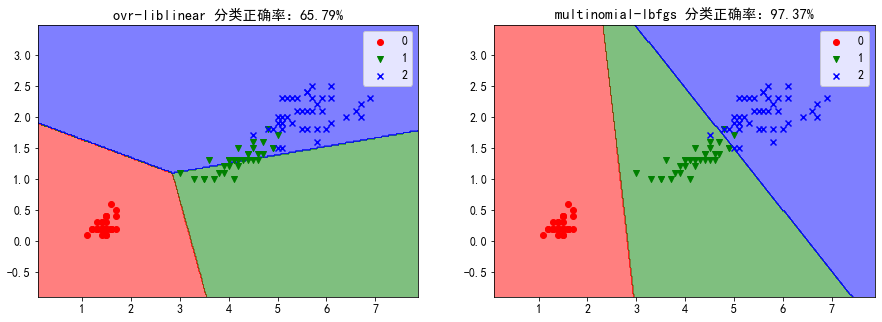

In [11]:
iris = load_iris()
X, y = iris.data, iris.target
# 仅使用其中的两个特征。
X = X[:, 2:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
random_state=0)
plt.figure(figsize=(15, 5))
# 定义不同的参数组合，用于循环。
params = [("ovr", "liblinear"), ("multinomial", "lbfgs")]
for index, (mc, s) in enumerate(params, start=1):
    lr = LogisticRegression(multi_class=mc, solver=s)
    lr.fit(X_train, y_train)
    y_hat = lr.predict(X_test)
    plt.subplot(1, 2, index)
    # 计算分类正确率。
    accuracy = np.sum(y_test == y_hat) / len(y_test)
    plt.title(f"{mc}-{s} 分类正确率：{accuracy * 100:.2f}%")
    plot_decision_boundary(lr, X_train, y_train)